In [36]:
import numpy as np
import matplotlib.pyplot as pl
import cv2 as cv

In [37]:
Image0 = cv.imread ('Images/lenna-bw-bin.pbm')
print (Image0.shape)

(512, 512, 3)


In [38]:
Image1 = cv.cvtColor (Image0, cv.COLOR_BGR2GRAY)
print (Image1.shape, np.min (Image1), np.max (Image1))

(512, 512) 0 255


In [39]:
Image = Image1 // 255
print ('shape =', Image.shape, ', min =', np.min (Image), ', max =', np.max (Image))

shape = (512, 512) , min = 0 , max = 1


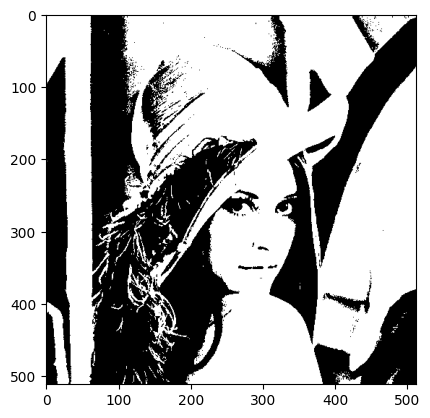

In [40]:
pl.imshow (Image1, cmap = 'gray')

In [41]:
LineNumber = 10

In [42]:
Line = Image [LineNumber, :]
print (Line.shape)

(512,)


(32, 512)


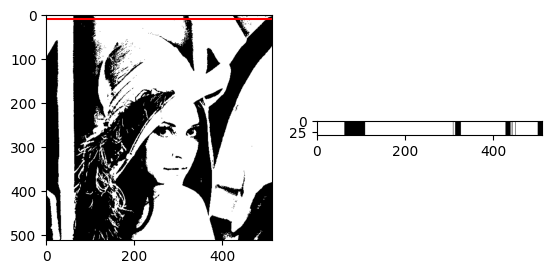

In [43]:
Thickness = 32
Thickline = np.tile (Line, (Thickness, 1))
print (Thickline.shape)

pl.subplot (1, 2, 1)
pl.imshow (Image, cmap = 'gray')
pl.plot ([0, Line.shape [0] - 1], [LineNumber, LineNumber], 'red')

pl.subplot (1, 2, 2)
pl.imshow (Thickline, cmap = 'gray')

In [44]:
def RLencode (array):
    last = 0
    count = 0
    result = []
    for value in array:
        if value == last:
            count += 1
        else:
            result.append (count)
            last = value
            count = 1
    if count > 0:
        result.append (count)
    return np.array (result)

In [45]:
Encoded = RLencode (Line)
print (Encoded.shape)
print (Encoded)
print (max (Encoded))

(17,)
[  0  62  47 199   1   4  13 101  11   1   1   2   1   6   1  50  12]
199


In [46]:
def RLdecode (enc):
    value = 0
    result = []
    for count in enc:
        result.extend ([value] * count)
        value = 1 - value
    return np.array (result)

In [47]:
Decoded = RLdecode (Encoded)
print (Decoded.shape)

(512,)


In [48]:
def Difference (image0, image1):
    return max (abs (Line - Decoded))

In [49]:
print (Difference (Image, Decoded))

0


In [50]:
Original = Image.flatten()
print (Original.shape)

(262144,)


In [51]:
Encoded = RLencode (Original)
print (Encoded.shape, max (Encoded))

(12059,) 244


In [52]:
print (Difference (Original, RLdecode (Encoded)))

0


In [53]:
print (Original.shape [0] / 8, Encoded.shape [0])

32768.0 12059


In [54]:
Encoded1 = [0]
Encoded1.extend (Encoded)

In [55]:
Decoded1 = RLdecode (Encoded1)

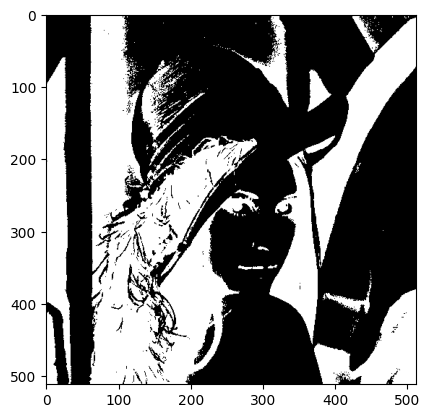

In [56]:
pl.imshow (Decoded1.reshape (Image.shape), cmap = 'gray')